'data.frame':	300 obs. of  3 variables:
 $ size  : int  100 100 100 100 100 100 100 100 100 100 ...
 $ method: chr  "generalized_dot" "matrix_vector_mul" "generalized_dot" "matrix_vector_mul" ...
 $ time  : num  3.1e-06 2.4e-06 2.3e-06 2.4e-06 2.5e-06 2.3e-06 2.2e-06 2.2e-06 2.3e-06 2.2e-06 ...


`summarise()` has grouped output by 'size'. You can override using the
`.groups` argument.


# A tibble: 30 × 4
# Groups:   size [15]
    size method             mean_time     sd_time
   <int> <chr>                  <dbl>       <dbl>
 1   100 generalized_dot   0.00000251 0.000000354
 2   100 matrix_vector_mul 0.00000255 0.000000626
 3  1100 generalized_dot   0.000841   0.000119   
 4  1100 matrix_vector_mul 0.000718   0.0000786  
 5  2100 generalized_dot   0.00302    0.000480   
 6  2100 matrix_vector_mul 0.00297    0.000524   
 7  3100 generalized_dot   0.00578    0.000720   
 8  3100 matrix_vector_mul 0.00549    0.000667   
 9  4100 generalized_dot   0.0101     0.00119    
10  4100 matrix_vector_mul 0.00977    0.000968   
# … with 20 more rows


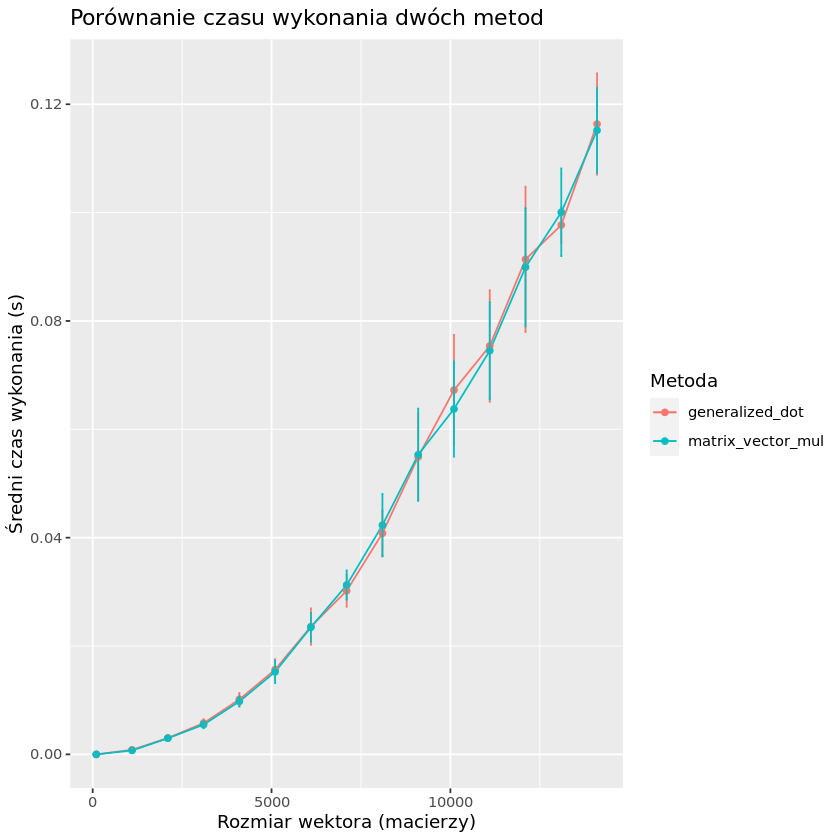

In [3]:
library(ggplot2)
library(dplyr)

data <- read.csv("experiment_results.csv")

str(data)

data_summary <- data %>%
  group_by(size, method) %>%
  summarise(
    mean_time = mean(time),
    sd_time = sd(time)
  )


print(data_summary)

plot <- ggplot(data_summary, aes(x = size, y = mean_time, color = method)) +
  geom_line() +
  geom_point() +
  geom_errorbar(aes(ymin = mean_time - sd_time, ymax = mean_time + sd_time), width = 50) +
  labs(
    title = "Porównanie czasu wykonania dwóch metod",
    x = "Rozmiar wektora (macierzy)",
    y = "Średni czas wykonania (s)",
    color = "Metoda"
  ) 

print(plot)
